In [72]:
pip install nbconvert

  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached markupsafe-3.0.3-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached tinycss2-1.4.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached fastjsonschema-2.21.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
!jupyter nbconvert --to script df_graficos_unificados.ipynb


[NbConvertApp] Converting notebook df_graficos_unificados.ipynb to script
[NbConvertApp] Writing 18054 bytes to df_graficos_unificados.py


# 📊 Análisis de Ventas – Proyecto Aurelion

Este informe presenta un análisis exploratorio de los datos de ventas de Aurelion, 
con el objetivo de identificar patrones de consumo, comportamiento de clientes, 
distribución geográfica, medios de pago y valores atípicos que puedan aportar 
insights relevantes para la toma de decisiones.

In [18]:
import pandas as pd

df = pd.read_csv('../../data/clean/datos_unificados_limpios.csv')
df.head()



,id_venta,fecha,id_cliente,nombre_cliente,email,ciudad,fecha_alta,medio_pago,id_producto,nombre_producto,categoria,cantidad,precio_unitario,importe
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,tarjeta,90,Toallas Húmedas x50,limpieza,1,2902,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,82,Aceitunas Negras 200g,alimentos,5,2394,11970
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,39,Helado Vainilla 1L,alimentos,5,469,2345
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,70,Fernet 750ml,alimentos,2,4061,8122
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,22,Medialunas de Manteca,alimentos,1,2069,2069


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=1
)
import os

os.makedirs("graficos", exist_ok=True)


In [20]:

sns.set_theme(style="whitegrid", palette="Blues")

plt.figure(figsize=(5,3))


<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [21]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')


In [22]:
ventas_totales = df['importe'].sum()

print(f"💵 Ventas Totales: ${ventas_totales:,.2f}")


💵 Ventas Totales: $2,651,417.00


In [23]:
ventas_por_mes = ( df
    .groupby(df['fecha'].dt.to_period("M"))['importe']
    .sum()
    .reset_index()
)


In [24]:
ventas_por_mes['fecha'] = ventas_por_mes['fecha'].astype(str)


## 📌 Indicadores Clave (KPIs)

A continuación se presentan los principales indicadores que permiten obtener una visión general del desempeño del negocio a partir del dataset unificado.

In [25]:
ventas_totales = df['importe'].sum()
venta_promedio = df['importe'].mean()
cantidad_ventas = df['id_venta'].nunique()

cliente_top = (
    df.groupby('nombre_cliente')['importe']
    .sum()
    .idxmax()
)

print(f"💰 Ventas totales: ${ventas_totales:,.2f}")
print(f"📊 Venta promedio: ${venta_promedio:,.2f}")
print(f"🧾 Cantidad de ventas: {cantidad_ventas}")
print(f"👤 Cliente con mayor gasto: {cliente_top}")


💰 Ventas totales: $2,651,417.00
📊 Venta promedio: $7,730.08
🧾 Cantidad de ventas: 120
👤 Cliente con mayor gasto: Agustina Flores


Estos indicadores permiten evaluar el nivel de ventas, el comportamiento promedio de las transacciones y la participación de los clientes, funcionando como punto de partida para el análisis visual posterior.

## 📈 Evolución de Ventas Mensuales

Este gráfico muestra la evolución de las ventas a lo largo del tiempo, permitiendo identificar tendencias, picos y variaciones mensuales.

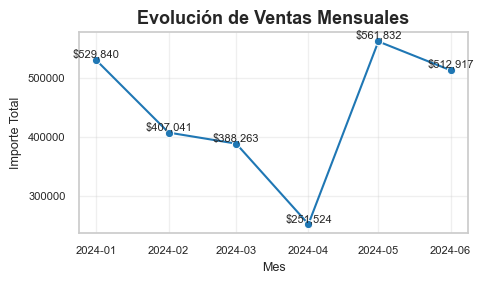

In [56]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

ventas_mes = (
    df.groupby(df['fecha'].dt.to_period('M'))['importe']
    .sum()
    .reset_index()
)

ventas_mes['fecha'] = ventas_mes['fecha'].dt.to_timestamp()

plt.figure(figsize=(5, 3))

sns.lineplot(
    data=ventas_mes,
    x='fecha',
    y='importe',
    marker='o',
    color='#1f77b4'
)

plt.title('Evolución de Ventas Mensuales', fontsize=13, fontweight='bold')
plt.xlabel('Mes', fontsize=9)
plt.ylabel('Importe Total', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


# Etiquetas con el total vendido por mes
for _, row in ventas_mes.iterrows():
    plt.text(
        row['fecha'],
        row['importe'] * 1.01,      # apenas arriba del punto
        f"${row['importe']:,.0f}",  # formato moneda
        ha='center',
        fontsize=8
    )
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("graficos/ventas_mes.png", dpi=300, bbox_inches="tight")
plt.show()


Se observa una variación en las ventas a lo largo de los meses, lo que permite detectar períodos de mayor actividad comercial y posibles estacionalidades. Mostrando la mayor baja en el mes de abril, para luego ascender en los proximos meses.

## 🧺 Ventas por Categoría de Producto

Este gráfico permite comparar el volumen de ventas entre las distintas categorías de productos.

C:\Users\Yo\AppData\Local\Temp\ipykernel_10684\3588781302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


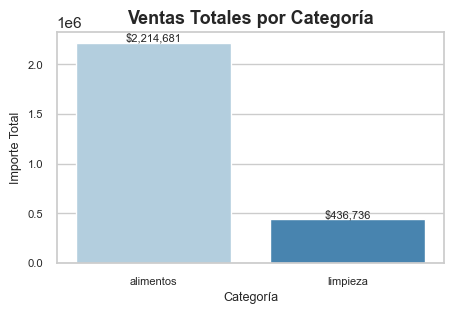

In [58]:
ventas_categoria = (
    df.groupby('categoria', as_index=False)['importe']
    .sum()
    .sort_values('importe', ascending=False)
)

plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=ventas_categoria,
    x='categoria',
    y='importe',
    palette='Blues'
)

plt.title('Ventas Totales por Categoría', fontsize=13, fontweight='bold')
plt.xlabel('Categoría', fontsize=9)
plt.ylabel('Importe Total', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Etiquetas de valor
for p in ax.patches:
    ax.annotate(
        f"${p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.show()



La comparación por categoría facilita identificar cuáles concentran mayor facturación y cuáles presentan menor participación en las ventas totales.

## 🏆 Top 10 Productos Más Vendidos

Se presentan los productos con mayor volumen de ventas, permitiendo identificar los artículos más relevantes del negocio.

C:\Users\Yo\AppData\Local\Temp\ipykernel_10684\3679259421.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


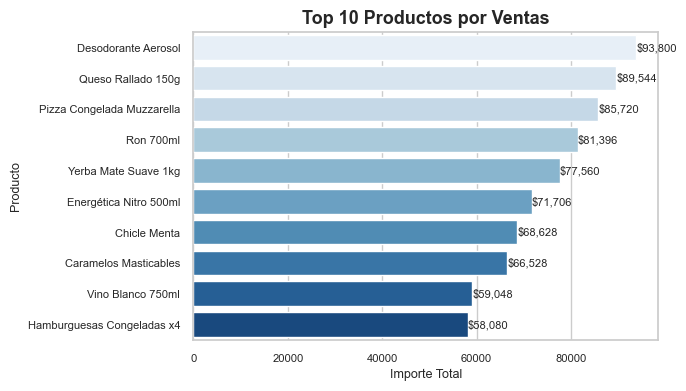

In [59]:
top_productos = (
    df.groupby('nombre_producto', as_index=False)['importe']
    .sum()
    .sort_values('importe', ascending=False)
    .head(10)
)

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=top_productos,
    y='nombre_producto',
    x='importe',
    palette='Blues'
)

plt.title('Top 10 Productos por Ventas', fontsize=13, fontweight='bold')
plt.xlabel('Importe Total', fontsize=9)
plt.ylabel('Producto', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Etiquetas
for p in ax.patches:
    ax.annotate(
        f"${p.get_width():,.0f}",
        (p.get_width(), p.get_y() + p.get_height()/2),
        va='center',
        fontsize=8
    )

plt.show()


Este ranking resulta útil para detectar productos estratégicos, optimizar el stock y orientar decisiones comerciales.

### 📍 Ventas por Región y Categoría

Este gráfico permite analizar cómo se distribuyen las ventas según la región y la categoría de producto, facilitando la identificación de patrones geográficos de consumo.

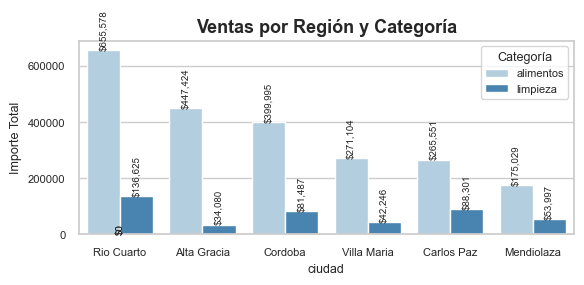

In [68]:
ventas_region_categoria = (
    df.groupby(['ciudad', 'categoria'], as_index=False)['importe']
    .sum()
    .sort_values('importe', ascending=False)
)

plt.figure(figsize=(6, 3))

ax = sns.barplot(
    data=ventas_region_categoria,
    x='ciudad',
    y='importe',
    hue='categoria',
    palette='Blues'
)

plt.title('Ventas por Región y Categoría', fontsize=13, fontweight='bold')
plt.xlabel('ciudad', fontsize=9)
plt.ylabel('Importe Total', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Etiquetas
for p in ax.patches:
    ax.annotate(
        f"${p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=7,
        rotation=90
    )

plt.legend(title='Categoría', fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()






## 💳 Distribución de Medios de Pago

Este gráfico muestra la proporción de ventas realizadas según el medio de pago utilizado por los clientes.

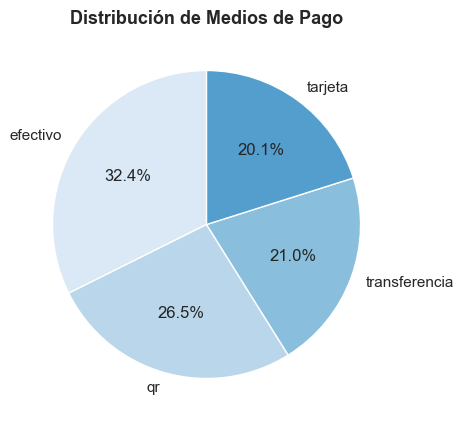

In [36]:
pago = df['medio_pago'].value_counts()

plt.figure(figsize=(5, 5))

plt.pie(
    pago,
    labels=pago.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Blues')
)

plt.title('Distribución de Medios de Pago', fontsize=13, fontweight='bold')

plt.savefig('./graficos/medios_pago_torta.png', dpi=300, bbox_inches='tight')
plt.show()


El análisis de los medios de pago permite comprender las preferencias de los clientes y evaluar la importancia de cada método en las transacciones. Siendo que lidera como opcion el efectivo.

## 👥 Top 10 Clientes con Mayor Gasto

Este gráfico presenta a los clientes que realizaron el mayor volumen de compras en términos de importe total.

C:\Users\Yo\AppData\Local\Temp\ipykernel_10684\472019251.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


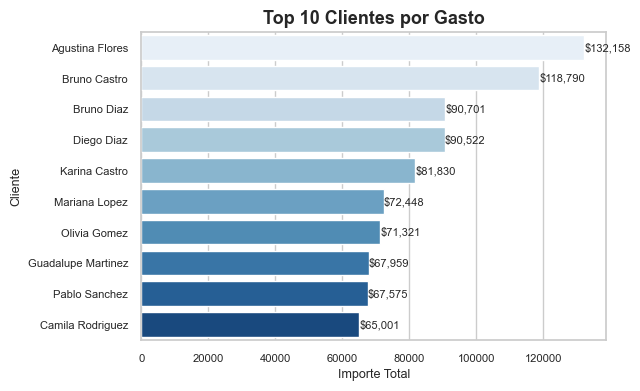

In [ ]:
top_clientes = (
    df.groupby('nombre_cliente', as_index=False)['importe']
    .sum()
    .sort_values('importe', ascending=False)
    .head(10)
)

plt.figure(figsize=(6, 4))

ax = sns.barplot(
    data=top_clientes,
    y='nombre_cliente',
    x='importe',
    palette='Blues'
)

plt.title('Top 10 Clientes por Gasto', fontsize=13, fontweight='bold')
plt.xlabel('Importe Total', fontsize=9)
plt.ylabel('Cliente', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for p in ax.patches:
    ax.annotate(
        f"${p.get_width():,.0f}",
        (p.get_width(), p.get_y() + p.get_height()/2),
        va='center',
        fontsize=8
    )

plt.show()



Este análisis permite identificar a los clientes más relevantes para el negocio, lo cual resulta útil para estrategias de fidelización y segmentación.

## 📊 Análisis Estadístico y Detección de Outliers

Se presentan gráficos estadísticos que permiten analizar la distribución de las ventas e identificar valores atípicos.

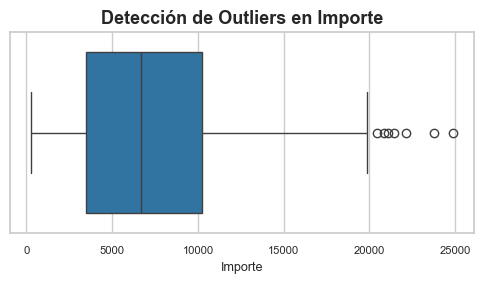

In [42]:
plt.figure(figsize=(5, 3))

sns.boxplot(
    x=df['importe'],
    color='#1f77b4'
)

plt.title('Detección de Outliers en Importe', fontsize=13, fontweight='bold')
plt.xlabel('Importe', fontsize=9)
plt.xticks(fontsize=8)

plt.tight_layout()
plt.savefig("graficos/estadisticas_outliers.png", dpi=300, bbox_inches="tight")
plt.show()


La detección de outliers ayuda a identificar ventas inusuales que podrían deberse a errores, promociones especiales o comportamientos atípicos.

## 🔗 Análisis de Correlación entre Variables

Este gráfico muestra la relación entre variables numéricas del dataset unificado.

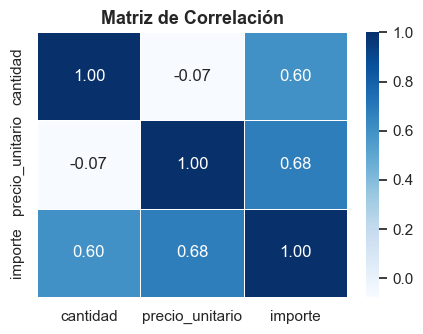

In [43]:
corr = df[['cantidad', 'precio_unitario', 'importe']].corr()

plt.figure(figsize=(4.5, 3.5))

sns.heatmap(
    corr,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Matriz de Correlación', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("graficos/correlacion.png", dpi=300, bbox_inches="tight")
plt.show()
plt.show()


El análisis de correlación permite detectar relaciones entre variables clave, aportando información útil para el análisis exploratorio de datos.

## 📊 Distribución de Importes y Análisis de Outliers

A continuación se presentan gráficos estadísticos que permiten analizar la distribución de los importes de venta y detectar valores atípicos.

In [63]:
# Cálculo de outliers con IQR
Q1 = df['importe'].quantile(0.25)
Q3 = df['importe'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['importe'] < limite_inferior) | (df['importe'] > limite_superior)]
cantidad_outliers = outliers.shape[0]

cantidad_outliers

7

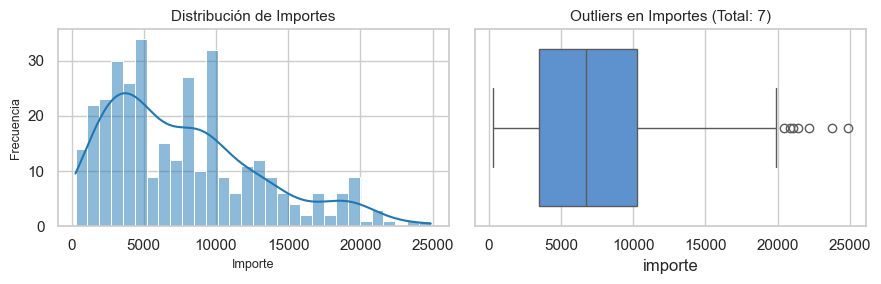

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Histograma (con línea KDE visible)
sns.histplot(
    df['importe'],
    bins=30,
    kde=True,
    color='#1f77b4',
    ax=axes[0]
)
axes[0].set_title('Distribución de Importes', fontsize=11)
axes[0].set_xlabel('Importe', fontsize=9)
axes[0].set_ylabel('Frecuencia', fontsize=9)

# Boxplot
sns.boxplot(
    x=df['importe'],
    color='#4a90e2',
    ax=axes[1]
)
axes[1].set_title(f'Outliers en Importes (Total: {cantidad_outliers})', fontsize=11)

plt.tight_layout()
plt.show()




El histograma permite observar la concentración de los importes, mientras que el boxplot facilita la identificación de outliers, aportando una visión clara sobre la variabilidad de las ventas.

# 🤖 Machine Learning – Modelo de Regresión

In [2]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   -- ------------------------------------- 1.8/36.3 MB 14.5 MB/s eta 0:00:03
   ----- ---------------------------------- 4.7/36.3 MB 11.5 MB/s eta 0:00:03
   ---------- ----------------------------- 9.7/36.3 MB 16.0 MB/s eta 0:00:02
   --------------- ------------------------ 13.9/36.3 MB 16.7 MB/s eta 0:00:02
   -------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importmos librerias

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Cargamos los datos

In [49]:
df = pd.read_csv('../data/clean/datos_unificados_limpios.csv')
df.head()


,id_venta,fecha,id_cliente,nombre_cliente,email,ciudad,fecha_alta,medio_pago,id_producto,nombre_producto,categoria,cantidad,precio_unitario,importe
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03,tarjeta,90,Toallas Húmedas x50,limpieza,1,2902,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,82,Aceitunas Negras 200g,alimentos,5,2394,11970
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,39,Helado Vainilla 1L,alimentos,5,469,2345
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,70,Fernet 750ml,alimentos,2,4061,8122
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18,qr,22,Medialunas de Manteca,alimentos,1,2069,2069


In [ ]:
# Preparación de datos para ML
df_ml = df.copy()

# Convertimos fecha a datetime
df_ml['fecha'] = pd.to_datetime(df_ml['fecha'], errors='coerce')

# Convertimos fecha a número para el modelo
df_ml['fecha_ordinal'] = df_ml['fecha'].map(pd.Timestamp.toordinal)

# Eliminamos filas con valores nulos en las columnas relevantes
df_ml = df_ml.dropna(subset=['fecha_ordinal', 'importe'])


In [51]:
# variables X e y
X = df_ml[['fecha_ordinal']]
y = df_ml['importe']


# 🧩 PASO 3 – TRAIN / TEST SPLIT

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# 🧩 PASO 4 – ENTRENAR EL MODELO

In [53]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# 🧩 PASO 5 – PREDICCIONES

In [54]:
y_pred = modelo.predict(X_test)


# 🧩 PASO 6 – MÉTRICAS

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.2f}")


MAE: 3,867.06
RMSE: 4,419.64
R²: -0.13


# 📊 PASO 7 – GRÁFICO REAL vs PREDICHO

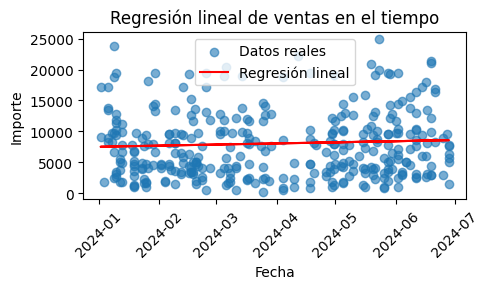

In [57]:
plt.figure(figsize=(5, 3))

# Puntos reales
plt.scatter(df_ml['fecha'], df_ml['importe'],
            alpha=0.6, label='Datos reales')

# Recta de regresión
plt.plot(
    df_ml['fecha'],
    modelo.predict(df_ml[['fecha_ordinal']]),
    color='red',
    label='Regresión lineal'
)

plt.xlabel('Fecha')
plt.ylabel('Importe')
plt.title('Regresión lineal de ventas en el tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


“En este gráfico se observa cómo el modelo de regresión logra seguir la tendencia temporal de las ventas, aunque presenta diferencias en meses con valores extremos.”

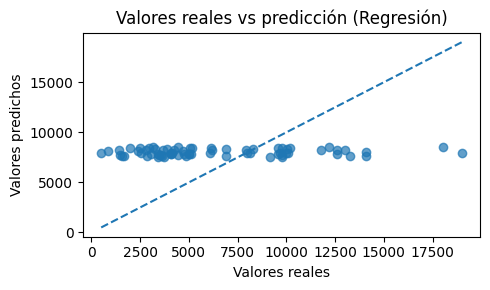

In [59]:
plt.figure(figsize=(5, 3))

plt.scatter(y_test, y_pred, alpha=0.7)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs predicción (Regresión)')
plt.tight_layout()
plt.show()


In [62]:
print('MAE:', mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))


MAE: 3867.061311732951
RMSE: 4419.638327840551
R2: -0.13385343358826574


“Este gráfico compara los valores reales con los valores predichos por el modelo.
Cuanto más cerca están los puntos de la línea diagonal, mejor es el desempeño del modelo.”

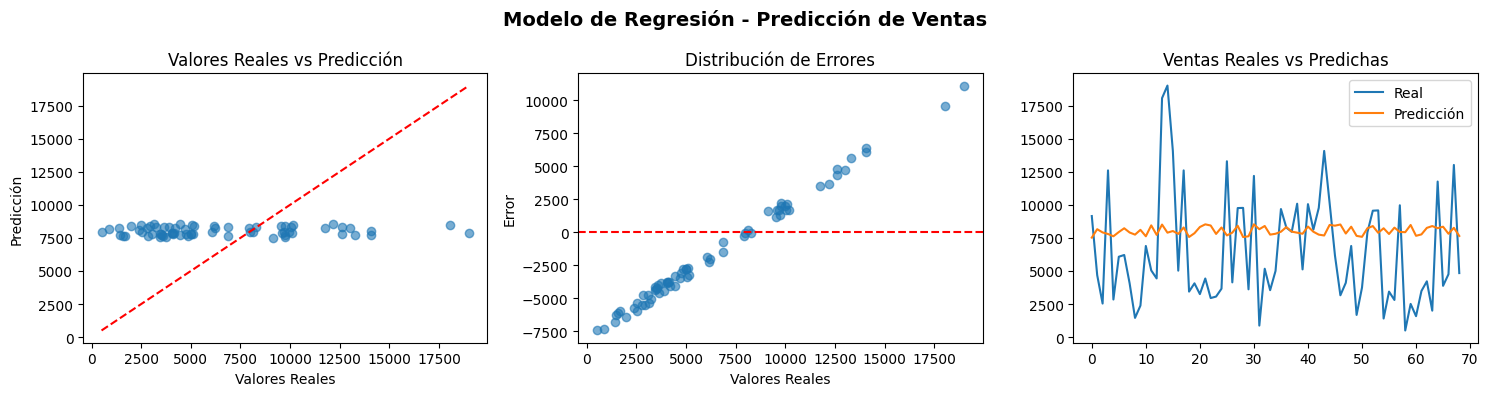

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1️⃣ Reales vs Predichos
axes[0].scatter(y_test, y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             '--', color='red')
axes[0].set_title('Valores Reales vs Predicción')
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicción')

# 2️⃣ Residuos
residuos = y_test - y_pred
axes[1].scatter(y_test, residuos, alpha=0.6)
axes[1].axhline(0, linestyle='--', color='red')
axes[1].set_title('Distribución de Errores')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Error')

# 3️⃣ Comparación Temporal (ordenada)
axes[2].plot(range(len(y_test)), y_test.values, label='Real')
axes[2].plot(range(len(y_test)), y_pred, label='Predicción')
axes[2].set_title('Ventas Reales vs Predichas')
axes[2].legend()

plt.suptitle('Modelo de Regresión - Predicción de Ventas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 📝 El modelo logra seguir la tendencia general de las ventas a lo largo del tiempo.

# Los errores de predicción se concentran alrededor de cero, lo que indica un ajuste razonable.

# Se observan valores atípicos, principalmente asociados a ventas de importes elevados, que afectan la precisión del modelo.



# 📊 Modelo de Regresión Lineal

Se entrenó un modelo de regresión lineal para analizar la relación entre el tiempo y el importe de las ventas, con el objetivo de identificar una posible tendencia temporal en el comportamiento de las ventas.

El dataset fue dividido en conjunto de entrenamiento y conjunto de prueba, y el desempeño del modelo se evaluó utilizando métricas básicas de error, lo que permitió validar su capacidad de ajuste sobre los datos disponibles.

In [ ]:
## Modelo de Clasificación

# creamos las variables objetivo (ALTA/BAJA)

In [63]:
# Clasificación de ventas según importe
umbral = df_ml['importe'].median()

df_ml['venta_clase'] = df_ml['importe'].apply(
    lambda x: 1 if x >= umbral else 0
)

df_ml['venta_clase'].value_counts()


venta_clase
1    174
0    169
Name: count, dtype: int64

# Seleccion de variables

In [64]:
X = df_ml[['fecha_ordinal']]
y = df_ml['venta_clase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 🧩 Paso 3 – Modelo de Clasificación

In [65]:
from sklearn.linear_model import LogisticRegression

modelo_clf = LogisticRegression()
modelo_clf.fit(X_train, y_train)

y_pred_clf = modelo_clf.predict(X_test)


# 🧩 Paso 4 – Métricas básicas

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf, zero_division=0))



Accuracy: 0.47572815533980584
[[ 0 54]
 [ 0 49]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.48      1.00      0.64        49

    accuracy                           0.48       103
   macro avg       0.24      0.50      0.32       103
weighted avg       0.23      0.48      0.31       103



📊 Paso 5 – Gráfico

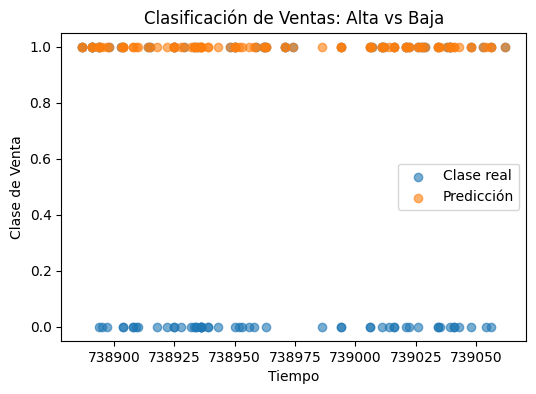

In [67]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label='Clase real', alpha=0.6)
plt.scatter(X_test, y_pred_clf, label='Predicción', alpha=0.6)
plt.xlabel('Tiempo')
plt.ylabel('Clase de Venta')
plt.title('Clasificación de Ventas: Alta vs Baja')
plt.legend()
plt.show()


En el grafico la fecha fue transformada a formato numérico para permitir el entrenamiento del modelo.”

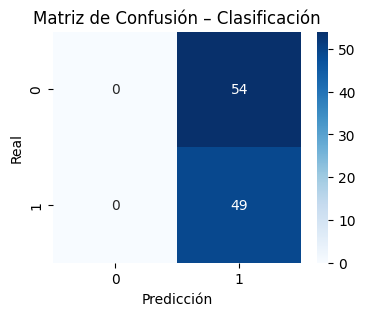

In [70]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_clf)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión – Clasificación')
plt.show()


Matriz de Confusión

La matriz de confusión muestra la comparación entre los valores reales y las predicciones del modelo de clasificación.
En este caso, el modelo tiende a clasificar todas las observaciones como ventas altas, lo que indica una dificultad para distinguir entre ambas clases.
Este comportamiento puede deberse al tamaño del dataset y al desbalance entre las clases, y resulta adecuado como ejercicio introductorio de clasificación.

### Modelo de Clasificación

Se entrenó un modelo de **clasificación logística** para clasificar las ventas en dos grupos:  
ventas de **importe alto** y ventas de **importe bajo**, utilizando el tiempo como variable explicativa.

El modelo permite identificar patrones generales y evaluar la capacidad predictiva para distinguir
ventas de mayor valor económico.
